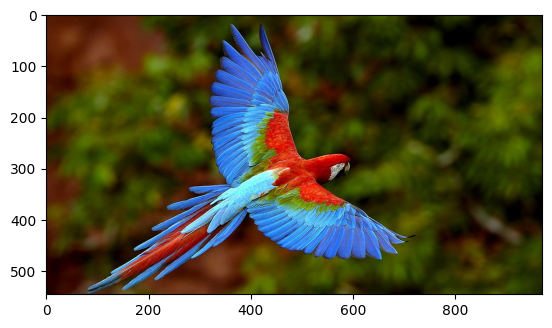

In [38]:
from PIL import Image , ImageDraw, ImageFont ,ImageOps
from bidi.algorithm import get_display
import arabic_reshaper
import matplotlib.pyplot as plt

image = Image.open("input/macaw.jpg")

# image.show()
plt.imshow(image)
plt.show()

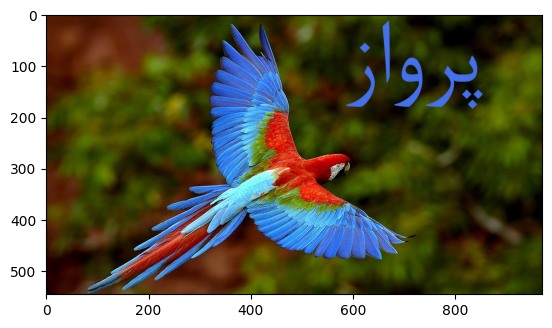

In [39]:
font = ImageFont.truetype("input/B-NAZANIN.TTF", 200)
text = "پرواز"
reshaped_text = arabic_reshaper.reshape(text)
bidi_text = get_display(reshaped_text)
draw = ImageDraw.Draw(image)
draw.text((580, 0), bidi_text, (68,112,235), font=font)

image.save("output/result1.jpg")
plt.imshow(image)
plt.show()